In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df_tesla = pd.read_csv('TSLA.csv')
df_tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2572,2020-09-16,439.869995,457.790009,435.309998,441.760010,441.760010,72279300
2573,2020-09-17,415.600006,437.790009,408.000000,423.429993,423.429993,76779200
2574,2020-09-18,447.940002,451.000000,428.799988,442.149994,442.149994,86406800
2575,2020-09-21,453.130005,455.679993,407.070007,449.390015,449.390015,109476800


In [3]:
# Convert the date column to date time format from string
df_tesla['Date'] = pd.to_datetime(df_tesla.Date)

In [4]:
# Set date as index
df_tesla.set_index('Date', inplace=True)
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


## Simple moving Average

<Axes: xlabel='Date'>

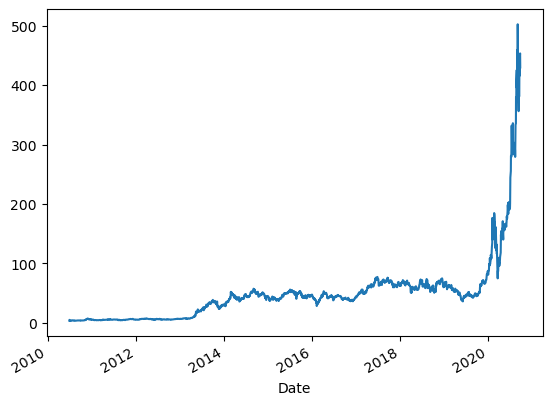

In [5]:
df_tesla['Open'].plot()

In [6]:
df_tesla['Open: 10 days rolling'] = df_tesla['Open'].rolling(window=10,
                                                            min_periods=1).mean()
df_tesla['Open: 30 days rolling'] = df_tesla['Open'].rolling(window=30,
                                                            min_periods=1).mean()
df_tesla['Open: 50 days rolling'] = df_tesla['Open'].rolling(window=50,
                                                            min_periods=1).mean()

In [7]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open: 10 days rolling,Open: 30 days rolling,Open: 50 days rolling
Date,,,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,3.800000,3.800000,3.800000
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,4.479000,4.479000,4.479000
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,4.652667,4.652667,4.652667
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,4.639500,4.639500,4.639500
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,4.511600,4.511600,4.511600


<Axes: xlabel='Date'>

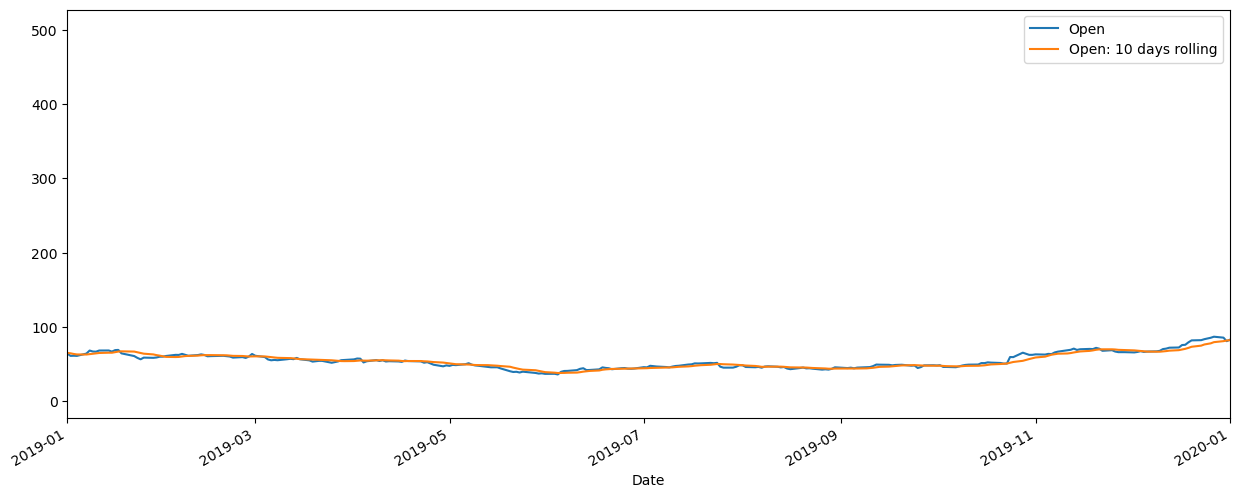

In [8]:
df_tesla[['Open', 'Open: 10 days rolling']].plot(xlim = ['2019-01-01',
                                                         '2020-01-01'],
                                                figsize = (15,6))

<Axes: xlabel='Date'>

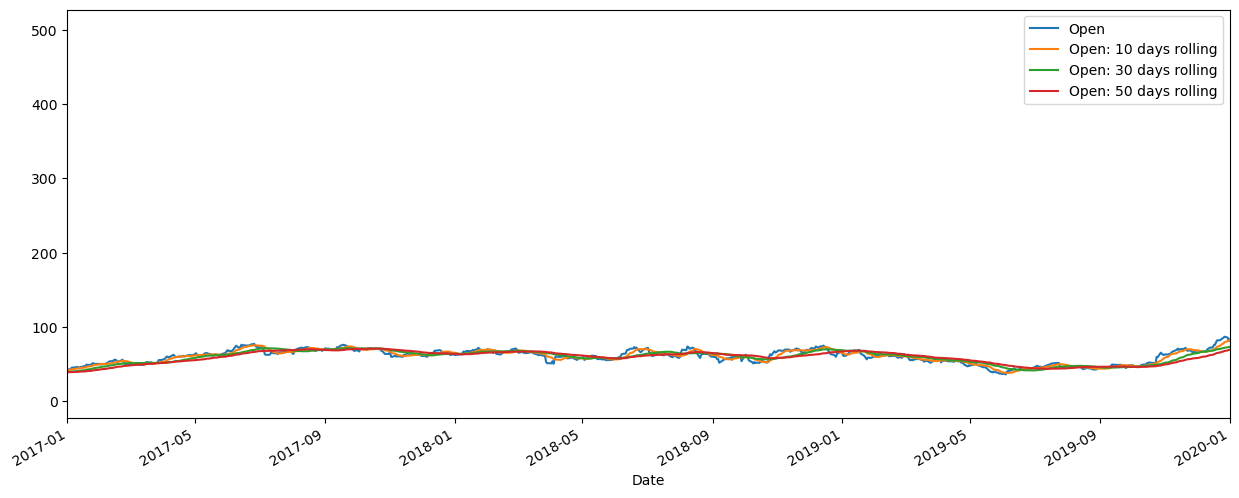

In [9]:
df_tesla[['Open', 'Open: 10 days rolling', 'Open: 30 days rolling',
          'Open: 50 days rolling']].plot(xlim = ['2017-01-01','2020-01-01'],
                                                figsize = (15,6))

## Cummulative Moving Average

<Axes: xlabel='Date'>

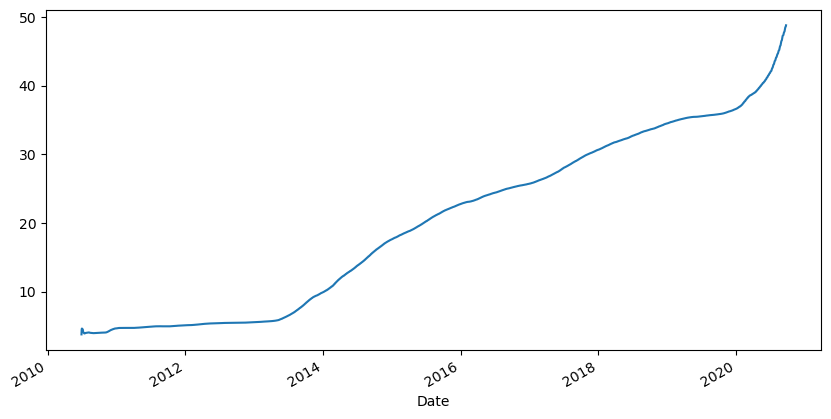

In [10]:
# Expanding function used to get Cummulative Moving Average

df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [11]:
print(df_tesla['Open'].head())
df_tesla['Open'].expanding().mean().head()

Date
2010-06-29    3.800
2010-06-30    5.158
2010-07-01    5.000
2010-07-02    4.600
2010-07-06    4.000
Name: Open, dtype: float64


Date
2010-06-29    3.800000
2010-06-30    4.479000
2010-07-01    4.652667
2010-07-02    4.639500
2010-07-06    4.511600
Name: Open, dtype: float64

## Exponential Moving Average (EMA)

((col_name - PrevEMA) * multiplier) + Prev EMA

col_name could be any value of close, open, low, high, etc
PrevEMA: in case of 1st EMA as PrevEMA value is not available, a simple moving average is taken

multiplier = 2/(rolling window size + 1)

## Exponential Weighted Moving Average(EWMA)

EMWA(t) = a * x(t) +(1-a) EMWA(t-1)

a: weight

x(t): 1st value in the particular column

EMWA(t-1): Previous EMWA value


In [12]:
# For smoothing factor 0.1
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust = False).mean()

# For smoothing factor 0.3
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust = False).mean()

# With span
df_tesla['EMA_5 days'] = df_tesla['Open'].ewm(span=5).mean()


<Axes: xlabel='Date'>

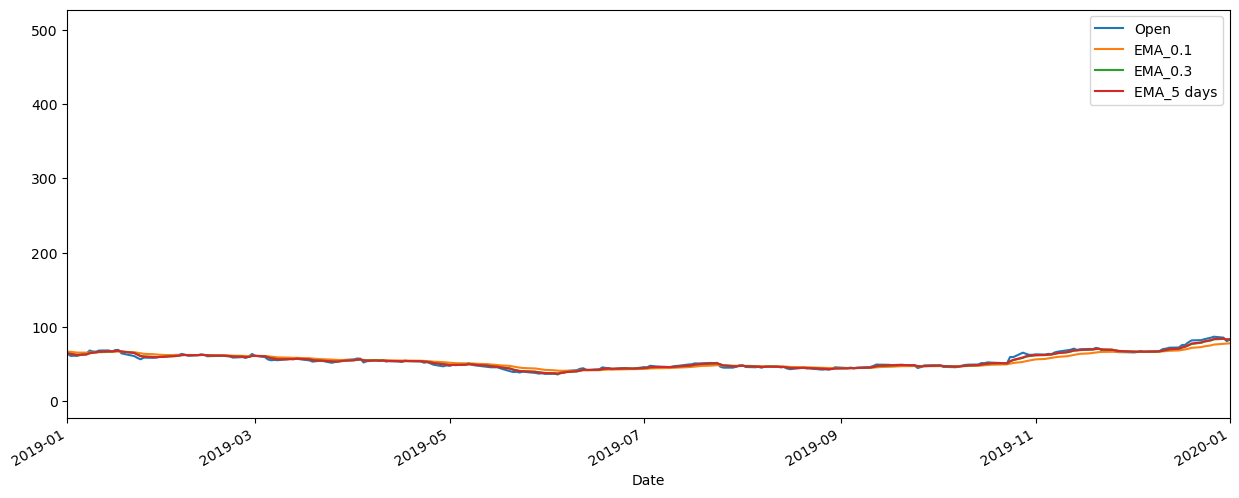

In [13]:
df_tesla[['Open','EMA_0.1', 'EMA_0.3','EMA_5 days']].plot(xlim = ['2019-01-01','2020-01-01'],
                                                figsize = (15,6))

In [14]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open: 10 days rolling,Open: 30 days rolling,Open: 50 days rolling,EMA_0.1,EMA_0.3,EMA_5 days
Date,,,,,,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,3.800000,3.800000,3.800000,3.800000,3.800000,3.800000
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,4.479000,4.479000,4.479000,3.935800,4.207400,4.614800
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,4.652667,4.652667,4.652667,4.042220,4.445180,4.797263
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,4.639500,4.639500,4.639500,4.097998,4.491626,4.715323
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,4.511600,4.511600,4.511600,4.088198,4.344138,4.440720
